In [6]:
#!/usr/bin/env python
# coding: utf-8

#/sdf/group/lcls/ds/tools/conda_envs/dream/config/dream/alg.yaml
import argparse
import sys
import yaml

import numpy as np
import psana as ps

import matplotlib.pyplot as plt

from psana.hexanode.PyCFD import PyCFD


sys.path.append('/sdf/group/lcls/ds/tools/smalldata_tools/pedplot/summaries/')
import panel as pn
from summary_utils import prepareHtmlReport

# parser = argparse.ArgumentParser(description='Preprocessing Tabulation Application')
# parser.add_argument('-r', '--run', type=int, required=True, help='Run number')
# parser.add_argument('-e', '--experiment', type=str,  required=True,help='experiment name e.g., tmo101247125')

# ARGS = parser.parse_args()

# run = ARGS.run
# exp= ARGS.experiment

RUN_NUM = 51
EXPERIMENT = 'tmo100833925'
spec_side = 's'

algorithm_file = '/sdf/group/lcls/ds/tools/conda_envs/dream/config/dream/alg.yaml'

with open(algorithm_file,'r') as f:
    det_configs = yaml.safe_load(f)
    mcp_cfd_configs = det_configs[spec_side]['det']['mcp']
    dld_cfd_configs = det_configs[spec_side]['det']['dld']

CFD_mcp = PyCFD(mcp_cfd_configs)
CFD_dld = PyCFD(dld_cfd_configs)


Text(0.5, 1.0, 'EXP = tmo100833925\n RUN_NUM = 51\n LW1')

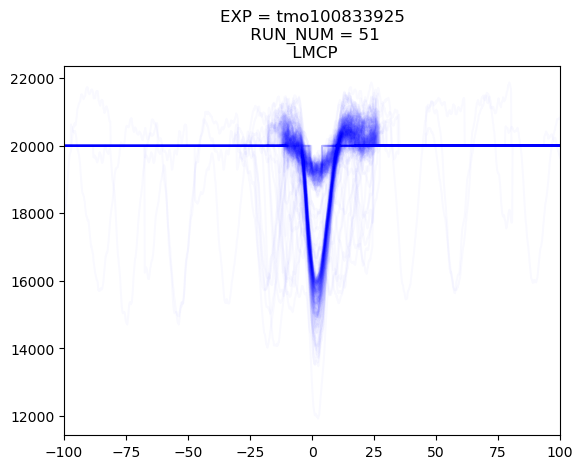

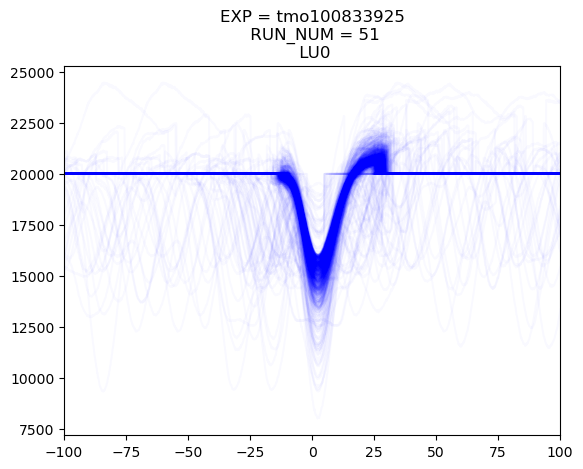

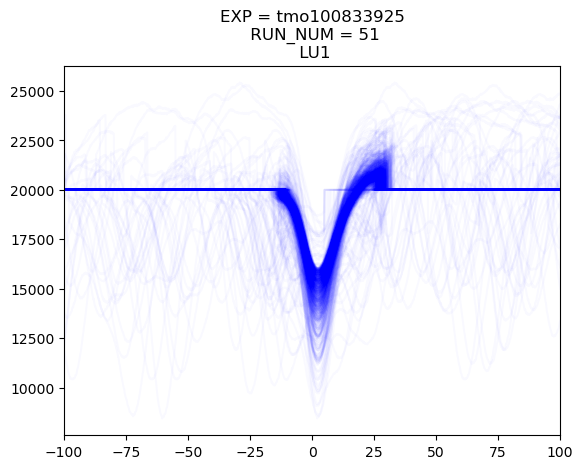

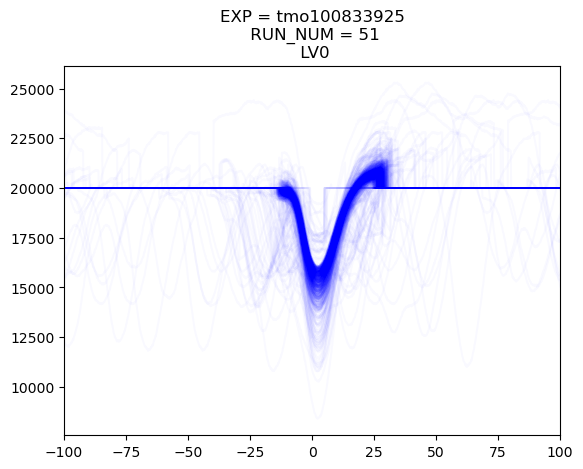

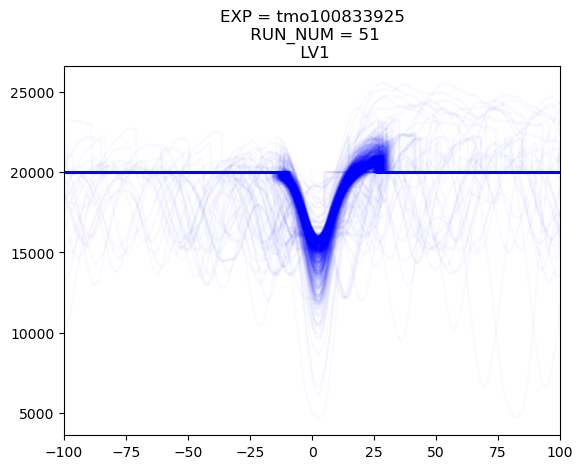

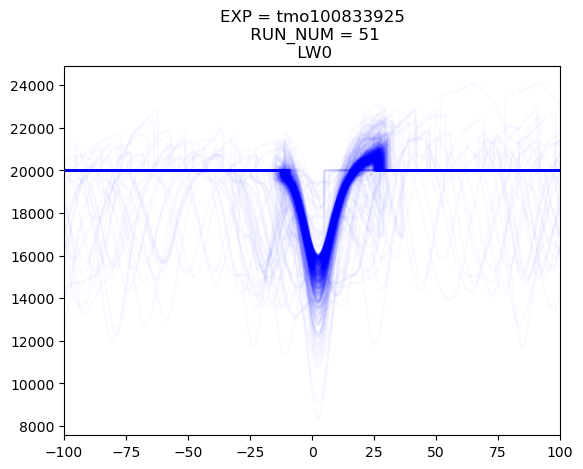

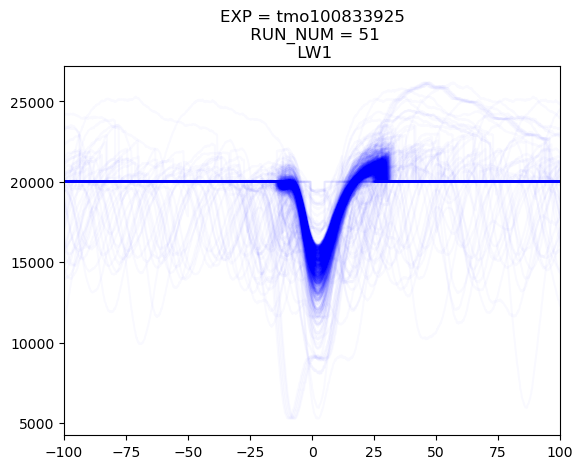

In [7]:
max_events = 1000
ds = ps.DataSource(exp=EXPERIMENT, run=RUN_NUM,max_events=max_events)
myrun = next(ds.runs())

# Create figures and axes *once*
fig_lmcp, ax_lmcp = plt.subplots(1)

fig_lu0, ax_lu0 = plt.subplots(1) 
fig_lu1, ax_lu1 = plt.subplots(1)

fig_lv0, ax_lv0 = plt.subplots(1)
fig_lv1, ax_lv1 = plt.subplots(1)

fig_lw0, ax_lw0 = plt.subplots(1)
fig_lw1, ax_lw1 = plt.subplots(1)


for evt in myrun.events():
    lmcp = myrun.Detector('dream_hsd_'+spec_side+'mcp').raw.padded(evt)

    if lmcp is not None:
        lmcp_pks = CFD_mcp.CFD(lmcp[0][0], lmcp[0]['times'] * 10**9)

        for pk in lmcp_pks:
            ax_lmcp.plot(lmcp[0]['times'] * 10**9 - pk, lmcp[0][0], color='b', alpha=0.025)

    lu = myrun.Detector('dream_hsd_'+spec_side+'u').raw.padded(evt)

    if lu is not None:
        lu0_pks = CFD_dld.CFD(lu[0][0], lu[0]['times'] * 10**9)

        for pk in lu0_pks:
            ax_lu0.plot(lu[0]['times'] * 10**9 - pk, lu[0][0], color='b', alpha=0.025)

        lu1_pks = CFD_dld.CFD(lu[1][0], lu[1]['times'] * 10**9)

        for pk in lu1_pks:
            ax_lu1.plot(lu[1]['times'] * 10**9 - pk, lu[1][0], color='b', alpha=0.025)

    lv = myrun.Detector('dream_hsd_'+spec_side+'v').raw.padded(evt)

    if lv is not None:
        lv0_pks = CFD_dld.CFD(lv[0][0], lv[0]['times'] * 10**9)

        for pk in lv0_pks:
            ax_lv0.plot(lv[0]['times'] * 10**9 - pk, lv[0][0], color='b', alpha=0.025)

        lv1_pks = CFD_dld.CFD(lv[1][0], lv[1]['times'] * 10**9)

        for pk in lv1_pks:
            ax_lv1.plot(lv[1]['times'] * 10**9 - pk, lv[1][0], color='b', alpha=0.025)

    lw = myrun.Detector('dream_hsd_'+spec_side+'w').raw.padded(evt)

    if lw is not None:
        lw0_pks = CFD_dld.CFD(lw[0][0], lw[0]['times'] * 10**9)

        for pk in lw0_pks:
            ax_lw0.plot(lw[0]['times'] * 10**9 - pk, lw[0][0], color='b', alpha=0.025)

        lw1_pks = CFD_dld.CFD(lw[1][0], lw[1]['times'] * 10**9)

        for pk in lw1_pks:
            ax_lw1.plot(lw[1]['times'] * 10**9 - pk, lw[1][0], color='b', alpha=0.025)

ax_lmcp.set_xlim([-100, 100])
ax_lmcp.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LMCP')

ax_lu0.set_xlim([-100, 100])
ax_lu0.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LU0')

ax_lu1.set_xlim([-100, 100])
ax_lu1.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LU1')

ax_lv0.set_xlim([-100, 100])
ax_lv0.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LV0')

ax_lv1.set_xlim([-100, 100])
ax_lv1.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LV1')


ax_lw0.set_xlim([-100, 100])
ax_lw0.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LW0')


ax_lw1.set_xlim([-100, 100])
ax_lw1.set_title(f'EXP = {EXPERIMENT}\n RUN_NUM = {RUN_NUM}\n LW1')



In [9]:

tabs = pn.Tabs([])

tabs_objects = [(spec_side+'mcp',fig_lmcp),
                (spec_side+'u0',fig_lu0),
                (spec_side+'u1',fig_lu1),
                (spec_side+'v0',fig_lv0),
                (spec_side+'v1',fig_lv1),
                (spec_side+'w0',fig_lw0),
                (spec_side+'w1',fig_lw1)]

for tabs_object in tabs_objects:
    tabs.append(tabs_object)

pageTitleFormat = "hit_find_signals/RUN{run:04d}_hit_find_signals"

prepareHtmlReport(tabs,EXPERIMENT,RUN_NUM,pageTitleFormat)


Made Directory to save data: /sdf/data/lcls/ds/tmo/tmo100833925/stats/summary/hit_find_signals/RUN0051_hit_find_signals


In [10]:
pn.extension() 

Tabs
    [0] JSON(list)
    [1] Matplotlib(Figure, name='smcp')
    [2] Matplotlib(Figure, name='su0')
    [3] Matplotlib(Figure, name='su1')
    [4] Matplotlib(Figure, name='sv0')
    [5] Matplotlib(Figure, name='sv1')
    [6] Matplotlib(Figure, name='sw0')
    [7] Matplotlib(Figure, name='sw1')
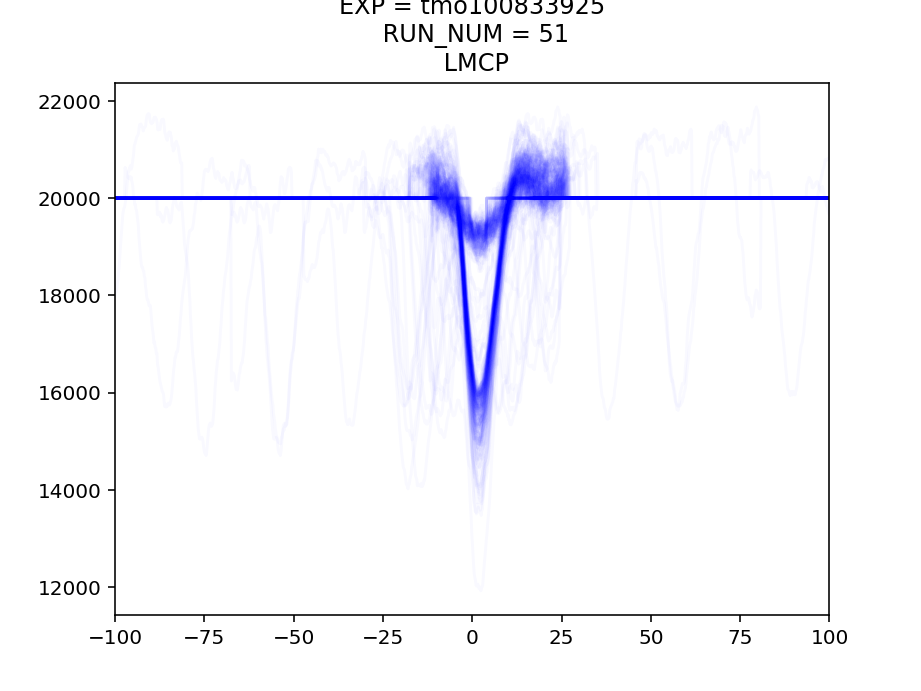
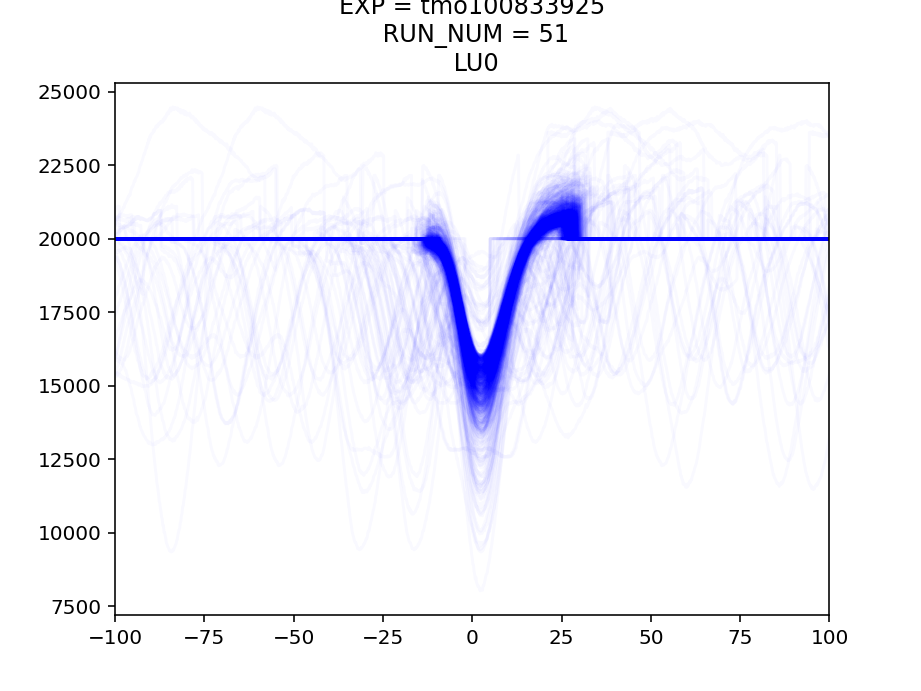
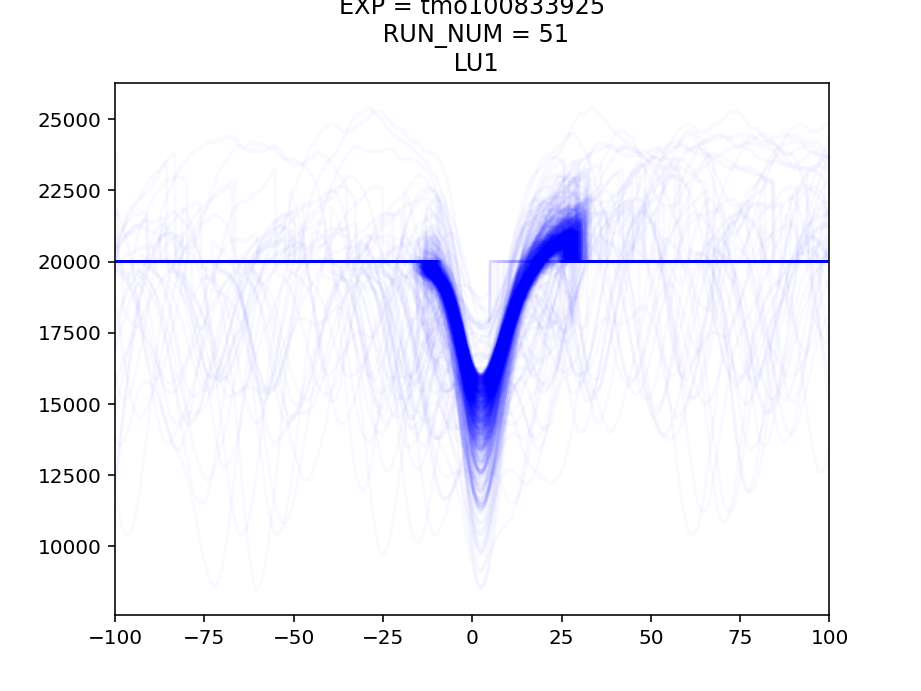
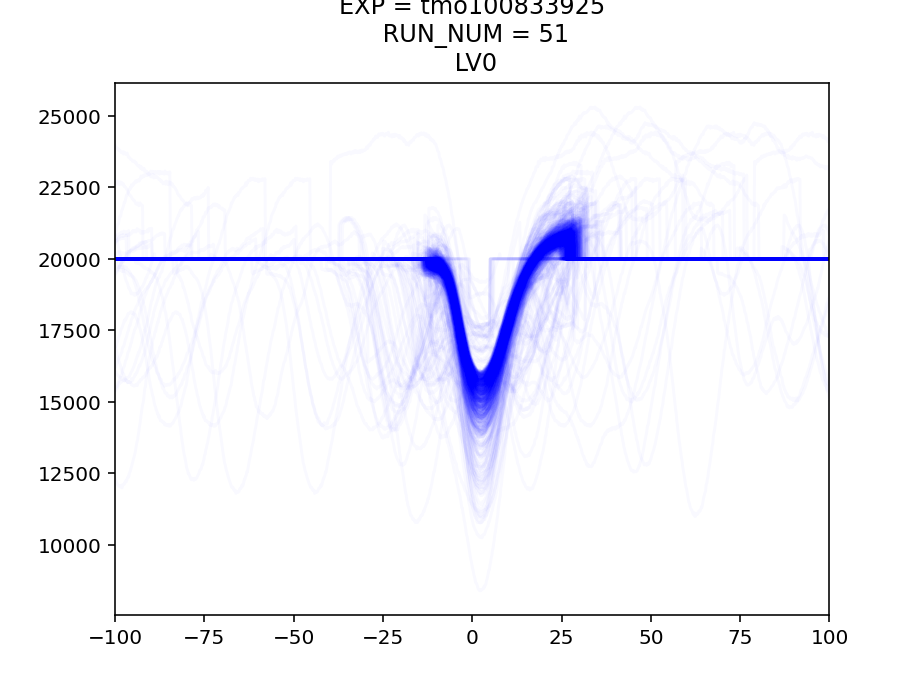
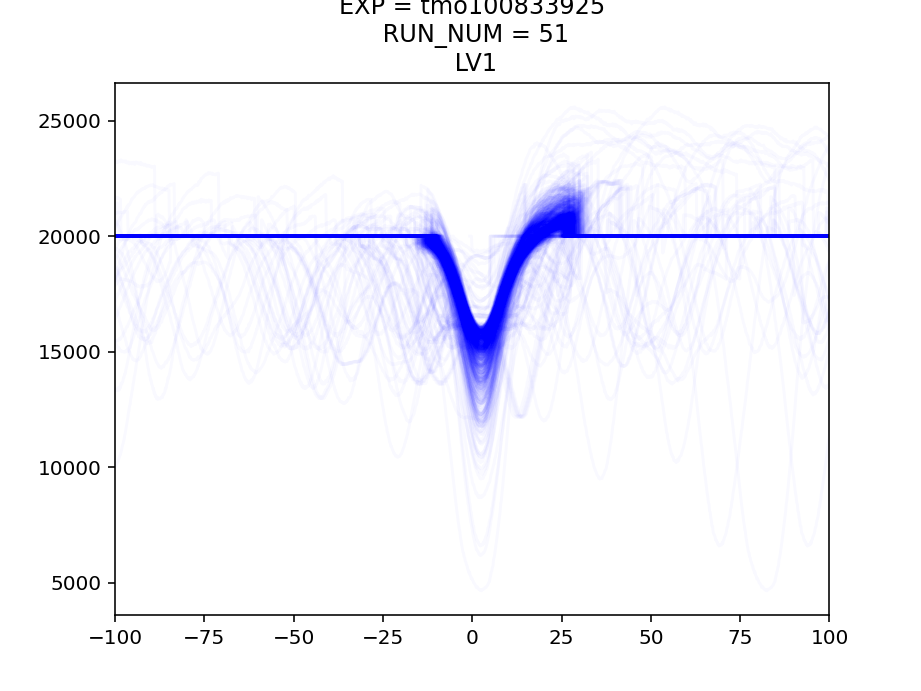
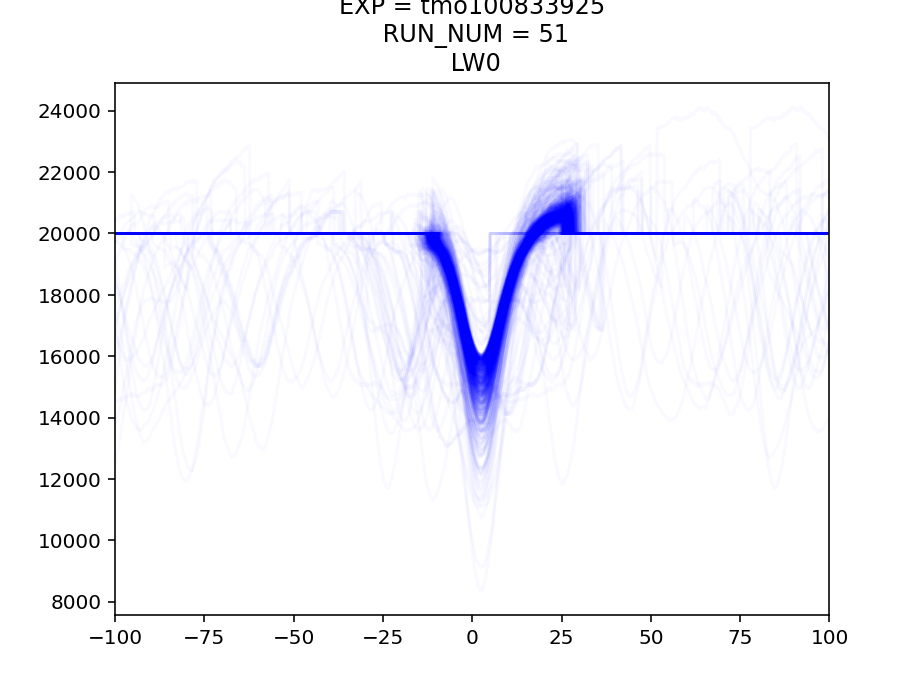
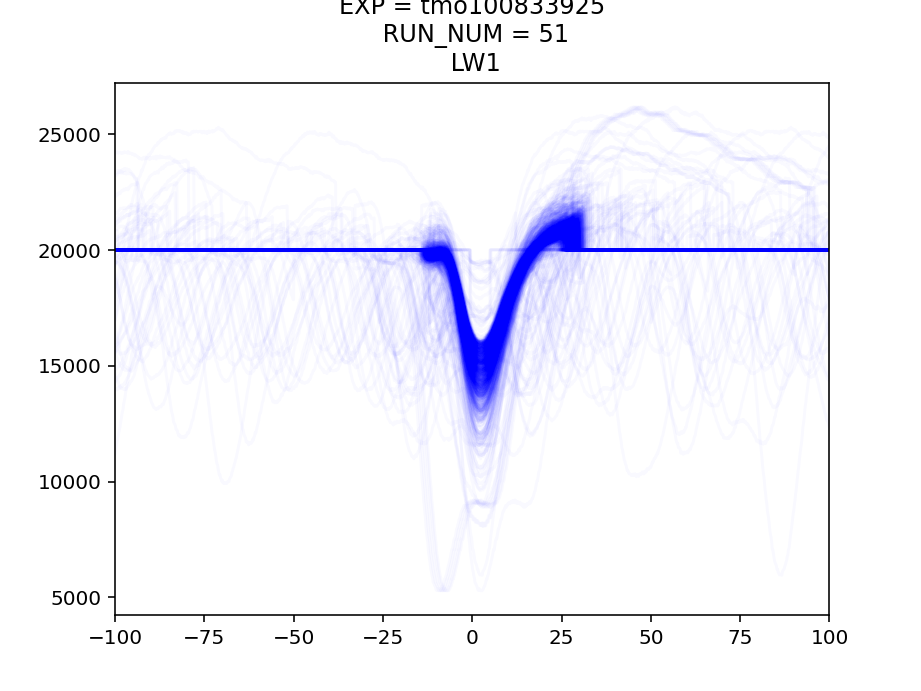

In [11]:
tabs